# Ejercicio 3 - guía 7

Ejercicio computacional

## a)
Escribir una función en Python que simule la distribución posterior 𝑝(𝜃 |𝑦) para un modelo
binomial con prior Beta(𝛼, 𝛽). La función debe tener como input los hiperparámetros del
prior (𝛼 y 𝛽), los datos observados (el número total de ensayos 𝑛 y la cantidad de éxitos 𝑦) y
la cantidad de samples de la posterior que quiero que devuelva.

### Desarrollo

In [1]:
from scipy.stats import beta

def posterior_binomial(alpha: int, betha: int, n: int, y: int, samples_devolver: int) -> list:
    posterior = beta(alpha + y, betha + n - y)
    return posterior.rvs(samples_devolver)

## b)
Un estudio reporta que de 100 pacientes tratados con un nuevo medicamento, 70 mostraron
mejoría. Calcular la distribución posterior de la probabilidad de mejoría 𝜃 después de este
estudio. Utilizar diferentes priors y comparar las distribuciones posteriores resultantes después de observar el mismo estudio. Graficar las distribuciones posteriores para visualizar
la influencia del prior en la inferencia bayesiana sobre 𝜃. ¿Qué sucede cuando se varía la
esperanza del prior? ¿Qué sucede cuando se varía 𝛼 + 𝛽 manteniendo constante la esperanza
del prior?

### Desarrollo

Primero defino algunas variables que me servirán para el análisis:

In [15]:
pacientes_tratados = 100
mostraron_mejoria = 70
# Siempre devuelvo 100 samples para tener un buen gráfico
samples_devolver = 100

Realizo los gráficos:

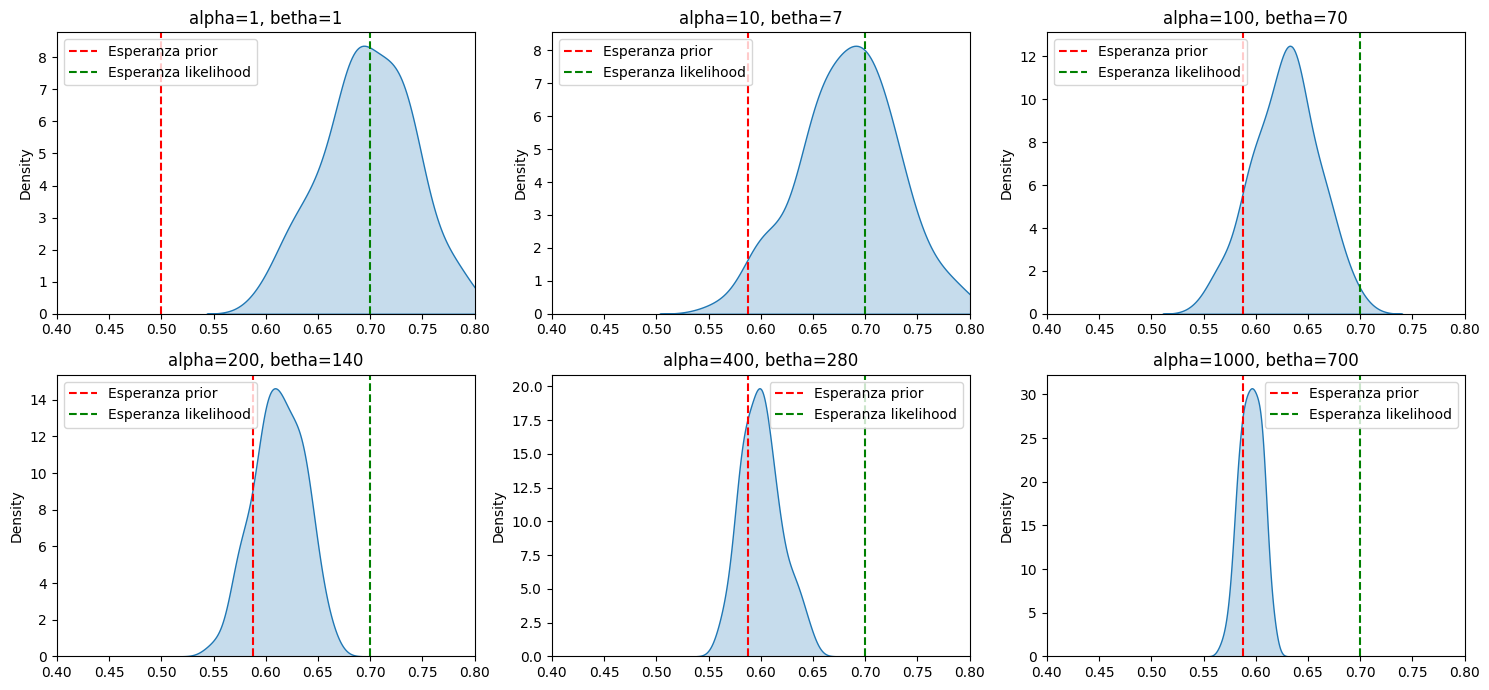

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(15, 7))

# Defino una lista de alphas y bethas
lista_alpha_betha = [(1, 1), (10, 7), (100, 70), (200, 140), (400, 280), (1000, 700)]

# Calculo la esperanza de la likelihood para incluirla en el gráfico
esperanza_likelihood = mostraron_mejoria / pacientes_tratados

for i, (alpha, betha) in enumerate(lista_alpha_betha):
    samples = posterior_binomial(alpha, betha, pacientes_tratados, mostraron_mejoria, samples_devolver)
    
    # Incluyo en cada gráfico la esperanza de cada prior
    axs[i // 3, i % 3].axvline(alpha / (alpha + betha), color='red', linestyle='--', label='Esperanza prior')
    
    # Incluyo en cada gráfico la esperanza de la likelihood
    axs[i // 3, i % 3].axvline(esperanza_likelihood, color='green', linestyle='--', label='Esperanza likelihood')

    # Gráficos para las posteriors
    sns.kdeplot(samples, ax=axs[i // 3, i % 3], fill=True)
    axs[i // 3, i % 3].set_title(f'alpha={alpha}, betha={betha}')
    axs[i // 3, i % 3].set_xlim(0.4, 0.8)
    axs[i // 3, i % 3].legend()

plt.tight_layout()
plt.show()

A partir de estos gráficos se pueden notar varias cosas:

* Primero tenemos que la esperanza de la binomial propuesta por el enunciado es de **0.7**, que es justo el pico que vemos en el primer gráfico
  a la izquierda cuando el prior es una Beta(1, 1), es decir: **No informativo**

* Luego en el resto de gráficos consideramos una distribución Beta de esperanza **apróximadamente 0.58**, que luego al 
  tomar valores de alpha y beta más grandes manteniendo la proporcionalidad con la esperanza se puede notar como cada vez más 
  **la posterior se acerca más a la esperanza del prior alejándose de la esperanza inicial de la likelihood**

Luego si se varía la esperanza del prior, la posterior se acercará más o menos a la esperanza dada según los valores de alpha y beta sean
más o menos altos.

## c)
Elegir alguno de los priors del item anterior y probar cómo cambia la distribución posterior
al variar la cantidad de pacientes tratados pero manteniendo constante la tasa de pacientes
que mostraron mejoría.

### Desarrollo

En este caso es una lógica similar a la del item anterior pero en vez de darle valores al prior, se le dan valores a la likelihood. Paso a ver eso gráficamente:

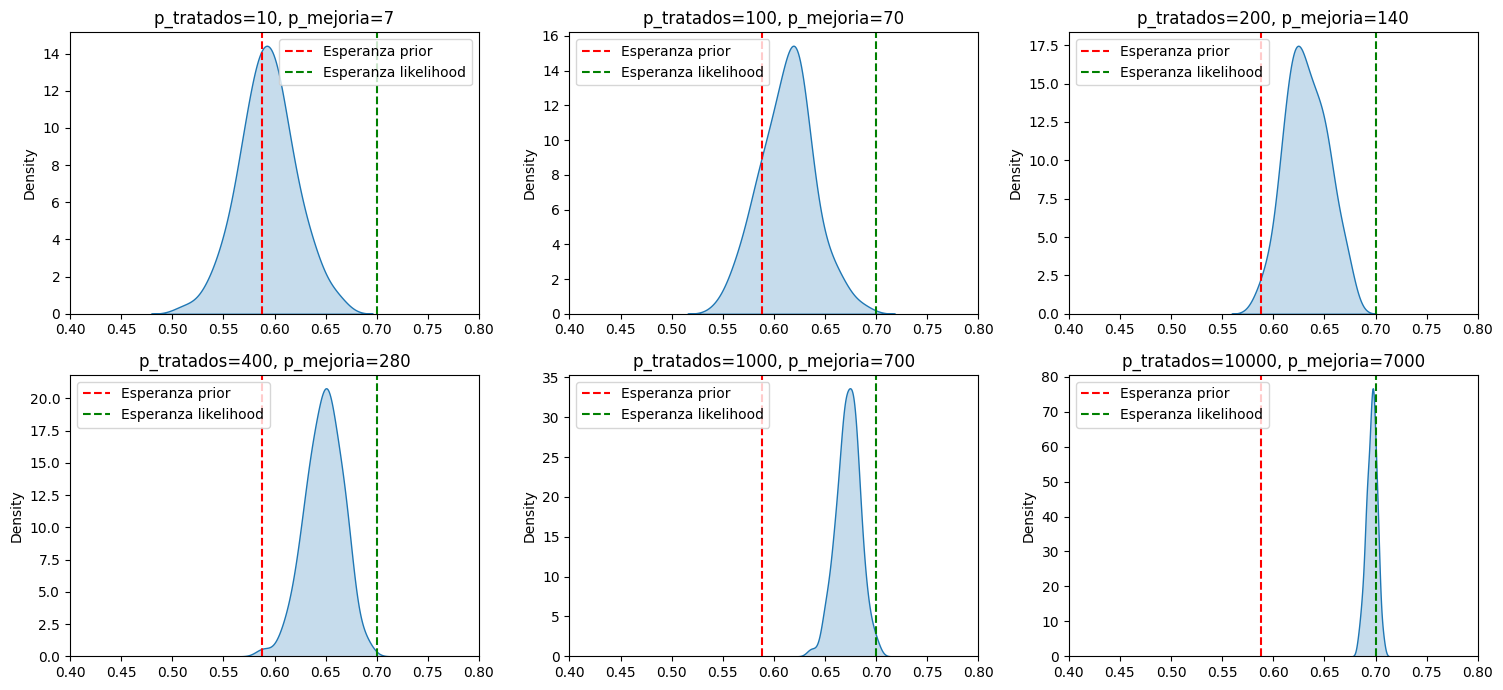

In [31]:
alpha_prior = 200
beta_prior = 140

fig, axs = plt.subplots(2, 3, figsize=(15, 7))

# Defino una lista de n y y
lista_n_y = [(10, 7), (100, 70), (200, 140), (400, 280), (1000, 700), (10000, 7000)]

# Calculo la esperanza del prior para incluirla en el gráfico
esperanza_prior = alpha_prior / (alpha_prior + beta_prior)
for i, (n, y) in enumerate(lista_n_y):
    samples = posterior_binomial(alpha_prior, beta_prior, n, y, samples_devolver)
    
    # Incluyo en cada gráfico la esperanza del prior
    axs[i // 3, i % 3].axvline(esperanza_prior, color='red', linestyle='--', label='Esperanza prior')
    
    # Incluyo en cada gráfico la esperanza de la likelihood
    axs[i // 3, i % 3].axvline(y/n, color='green', linestyle='--', label='Esperanza likelihood')

    # Gráficos para las posteriors
    sns.kdeplot(samples, ax=axs[i // 3, i % 3], fill=True)
    axs[i // 3, i % 3].set_title(f'p_tratados={n}, p_mejoria={y}')
    axs[i // 3, i % 3].set_xlim(0.4, 0.8)
    axs[i // 3, i % 3].legend()

plt.tight_layout()
plt.show()